In [7]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")


In [8]:
import os

In [9]:
data= pd.read_csv('D:\Pandas/crypto-markets.csv', parse_dates=['date'],index_col='date')

In [10]:
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [25]:
# select Bitcoin (BTC), Litecoin (LTC), Ethereum (ETH), Zcash (ZEC), Ripple (XRP), Monero (XMR) and Bitcoin Cash (BCH)
data = data[data.symbol.isin(['BTC', 'LTC', 'ETH', 'ZEC', 'XRP', 'XMR', 'BCH'])]

In [26]:
data.name.value_counts()

Bitcoin         1761
Litecoin        1761
Ripple          1663
Monero          1372
Ethereum         930
Zcash            481
Bitcoin Cash     214
Name: name, dtype: int64

# Check Missing Values

In [27]:
# check if data set contains missing values
print(data.isnull().sum())

# assert that there are no missing values
assert data.notnull().all().all()

slug           0
symbol         0
name           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [28]:
# check if data set contains duplicated records
print(data.duplicated().sum())

0


# Market Capitalization and Transaction Volume

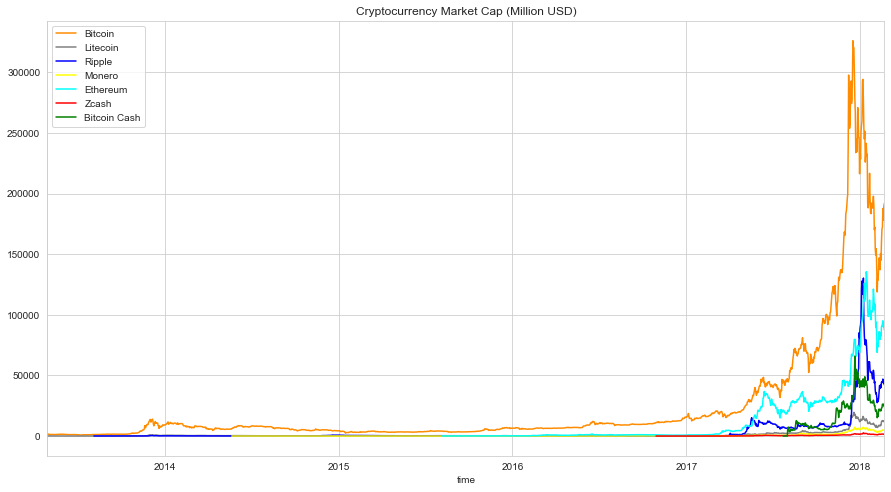

In [29]:
# plot market capitalization
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['market']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['market']/1000000).plot(color='grey', label='Litecoin')
(ripple['market']/1000000).plot(color='blue', label='Ripple')
(monero['market']/1000000).plot(color='yellow', label='Monero')
(ethereum['market']/1000000).plot(color='cyan', label='Ethereum')
(zcash['market']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['market']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

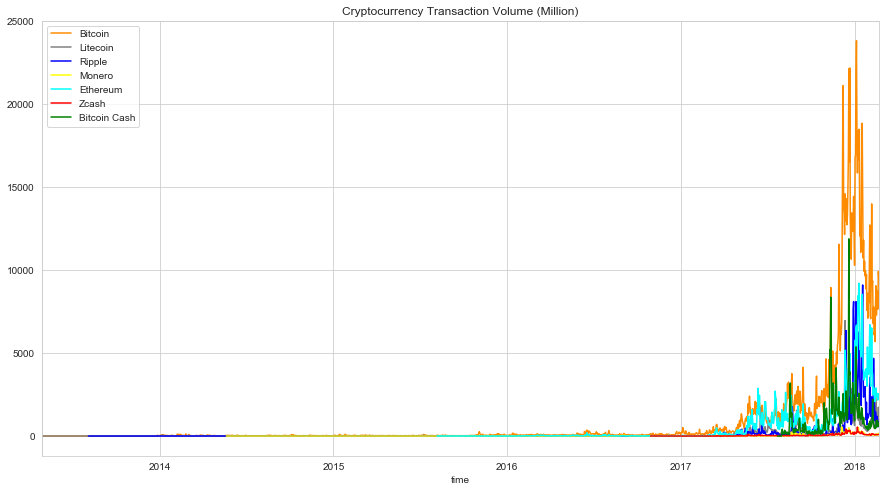

In [30]:
# plot transaction volume
plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['volume']/1000000).plot(color='blue', label='Ripple')
(monero['volume']/1000000).plot(color='yellow', label='Monero')
(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')
(zcash['volume']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['volume']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million)')
plt.show()

# Price Fluctuation of Cryptocurrencies

In [31]:
data = data['2017-01-01':]
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68


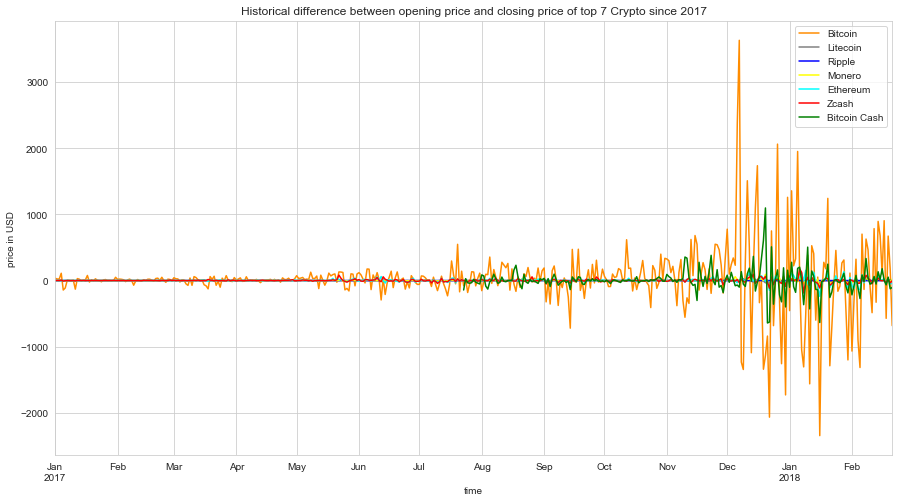

In [32]:
# Difference between opening and closing price
data['oc_diff']=data['close']-data['open']
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['oc_diff']).plot(color='darkorange', label='Bitcoin')
(litecoin['oc_diff']).plot(color='grey', label='Litecoin')
(ripple['oc_diff']).plot(color='blue', label='Ripple')
(monero['oc_diff']).plot(color='yellow', label='Monero')
(ethereum['oc_diff']).plot(color='cyan', label='Ethereum')
(zcash['oc_diff']).plot(color='red', label='Zcash')
(bitcoin_cash['oc_diff']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 7 Crypto since 2017')
plt.legend()
plt.show()

In [33]:
# Average difference for each cryptocurrency
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ripple':[(ripple['oc_diff']).mean()],
          'monero':[(monero['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()],
          'zcash':[(zcash['oc_diff']).mean()],
          'bitcoin_cash':[(bitcoin_cash['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

,bitcoin,litecoin,ripple,monero,ethereum,zcash,bitcoin_cash
avg.diff,22.604724,0.450552,0.002482,0.638345,1.86199,0.997602,2.66972


# Moving Averages and Price Trend

In [34]:
# calculate 5-day moving averages
btc = bitcoin[['close']]
btc.columns = ['BTC']
btc_ma=btc.rolling(window=5).mean()

ltc = litecoin[['close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = ripple[['close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

xmr = monero[['close']]
xmr.columns = ['XMR']
xmr_ma=xmr.rolling(window=5).mean()

eth = ethereum[['close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()

zec = zcash[['close']]
zec.columns = ['ZEC']
zec_ma=zec.rolling(window=5).mean()

bch = bitcoin_cash[['close']]
bch.columns = ['BCH']
bch_ma=bch.rolling(window=5).mean()
# create matrix of close price only for later use
close = pd.concat([btc,ltc,xrp,xmr,eth,zec,bch], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,xrp_ma,xmr_ma,eth_ma,zec_ma,bch_ma], axis=1)
close_ma.tail()

,BTC,LTC,XRP,XMR,ETH,ZEC,BCH
date,,,,,,,
2018-02-17,9921.188,211.586,1.132,287.350,924.826,478.006,1414.730
2018-02-18,10311.886,222.824,1.150,300.436,940.558,478.784,1465.826
2018-02-19,10658.020,224.764,1.150,308.402,944.620,476.620,1500.326
2018-02-20,10905.480,226.248,1.138,308.632,936.298,466.984,1508.910
2018-02-21,10996.780,222.894,1.114,313.858,917.450,457.640,1460.162


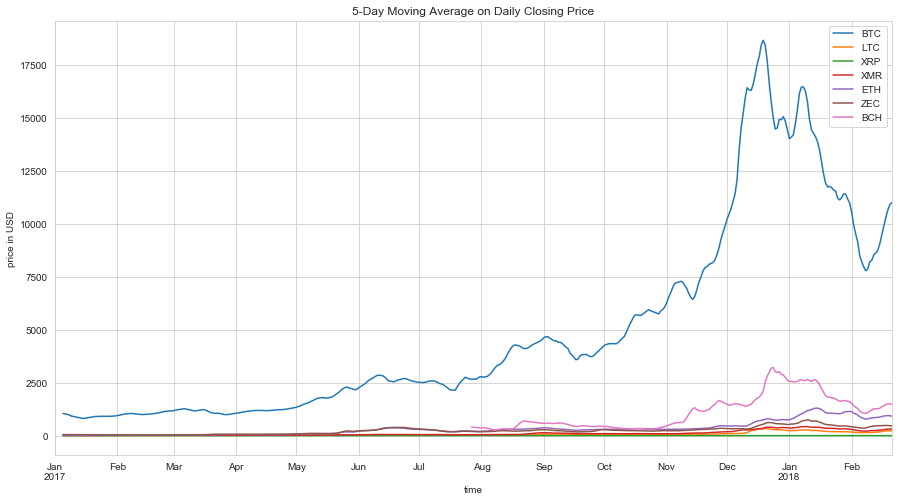

In [35]:
# plot moving average for closing price for cryptocurrencies
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

# Market Prices of Cryptocurrencies

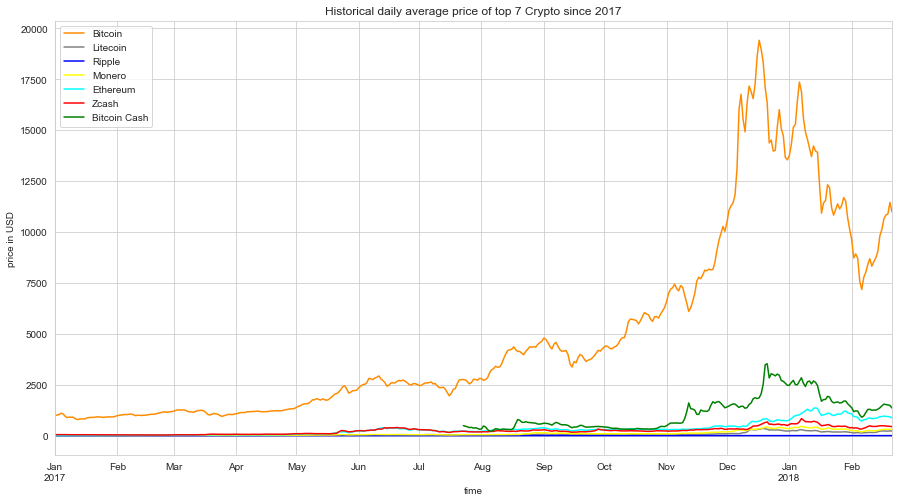

In [36]:
# calculate daily average price
data['daily_avg'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')
(ripple['daily_avg']).plot(color='blue', label='Ripple')
(monero['daily_avg']).plot(color='yellow', label='Monero')
(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')
(zcash['daily_avg']).plot(color='red', label='Zcash')
(bitcoin_cash['daily_avg']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of top 7 Crypto since 2017')
plt.legend()
plt.show()

### Plot individual daily open, high, low, close prices

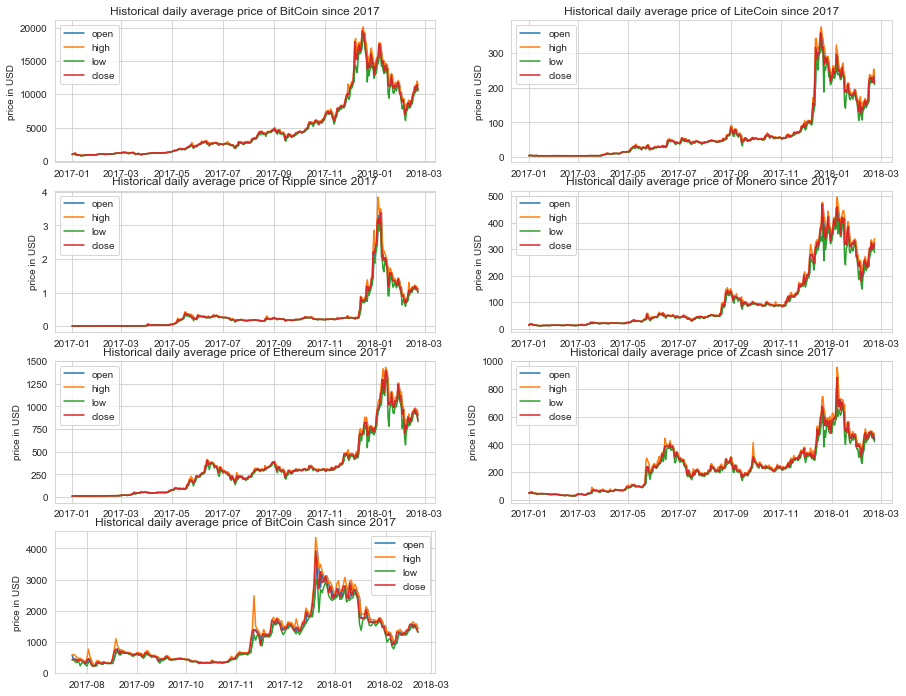

In [37]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(ripple[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ripple since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(monero[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Monero since 2017')
plt.legend(['open','high','low','close'])
plt.subplot(4,2,5)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,6)
plt.plot(zcash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Zcash since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,7)
plt.plot(bitcoin_cash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin Cash since 2017')
plt.legend(['open','high','low','close'])

plt.show()

### Check Pearson correlation coefficient to prove if BitCoin price influences price of other cryptocurrencies

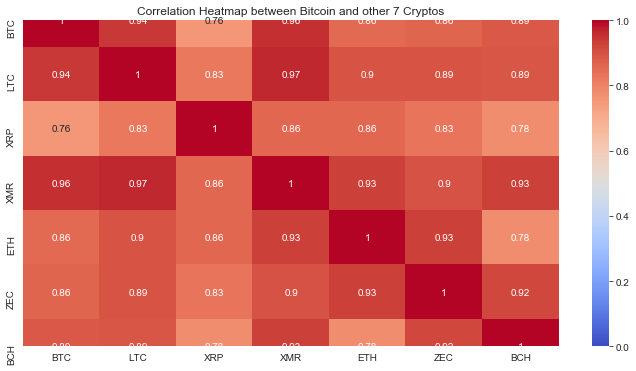

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 7 Cryptos')
plt.show()

# Conclusion - Investment Suggestion

#### How to maximize your short term investment gains?
10% to 25% in Bitcoin (BTC) and Ethereum (ETH). Bitcoin and Ethereum are the main drivers of the cryptocurrency markets and the markets often mirror their performance. These coins represent a solid foundation to any portfolio but will be outperformed in the short to medium term by altcoins and ICOs. As a result, limit your investments in these coins.

25% to 55% in stock market, in contrast to cryptocurrency which A 10% drop in prices over the course of 24 hours is no longer as alarming as it used to be, stock market is as a safer place comparably where drastic fall in price is less likely to happen.

25% to 55% in savings and Funds, the safest place to put money is still in the bank. Depending on the risk averseness of an investor, it's advised to put 25% to 55% of their investment to bank or investment funds.

10% to 15% in swing trading and/or day trading, the more volatile cryptocurrencies such as Lisk (LSK) and OmiseGO (OMG) which record high daily trade volumes are good options for both swing and day trading. Traders should seek to benefit from price fluctuations and should utilize the leverage trading options provided by some of the top exchanges. More experienced traders should make use of shorting orders to also benefit from drops in price.

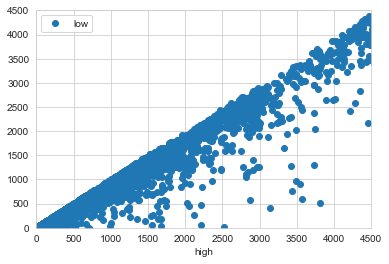

In [13]:
import statsmodels.formula.api as sm
dataReg = data.loc[:, ["high", "low"]]
dataReg.plot('high', 'low', style='o')
plt.xlim([0, 4500])
plt.ylim([0, 4500])
plt.show()

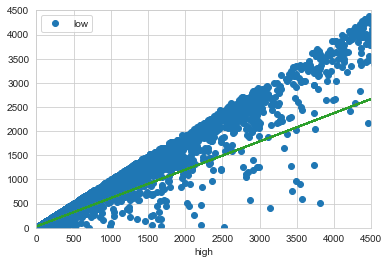

In [15]:

Rez1= sm.ols('low ~ high', dataReg).fit() 
Rez2 = sm.ols('low ~ high', dataReg[:-100]).fit() 
dataReg.plot('high', 'low', style='o')
plt.plot(dataReg.high, Rez1.fittedvalues)
plt.plot(dataReg.high[:-100], Rez2.fittedvalues)
plt.xlim([0, 4500])
plt.ylim([0, 4500])
plt.show()

In [16]:
# Rezime regresije uz pomoc gotovih funkcija summary:
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                    low   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 5.652e+06
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:15:21   Log-Likelihood:            -6.6678e+06
No. Observations:              702166   AIC:                         1.334e+07
Df Residuals:                  702164   BIC:                         1.334e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4247      3.844      7.395      0.0

In [17]:

###We see a huge difference in the R ^ 2 index (used to check the model's agreement with the data) in these two cases